In [2]:
#Importing Ton of Modules .
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import seaborn as sns
from pandas import DataFrame, Series
import sqlite3 as db
from pandasql import sqldf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import resample
from sklearn import model_selection
from sklearn import metrics
from sklearn.decomposition import PCA

### 1.	Import HR_Employee_Attrition_Data.csv

In [111]:
hr_df = pd.read_csv("HR_Employee_Attrition_Data.csv")

In [4]:
hr_df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               3   
3                 3          4  Life Sciences              1               4   
4                 2          1        Medical              1               5   

           ...           RelationshipSatisfaction StandardHours  \
0          ...                                  1            80   
1          ...                                  4            80   
2          ...                                  2            80   
3          ...                                  3            80   
4          ...                                  4            80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
0                 0                  8                      0               1   
1                 1                 10                      3               3   
2                 0                  7                      3               3   
3                 0                  8                      3               3   
4                 1                  6                      3               3   

   YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0               6                  4                        0   
1              10                  7                        1   
2               0                  0                        0   
3               8                  7                        3   
4               2                  2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 35 columns]

In [6]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
Age                         2940 non-null int64
Attrition                   2940 non-null object
BusinessTravel              2940 non-null object
DailyRate                   2940 non-null int64
Department                  2940 non-null object
DistanceFromHome            2940 non-null int64
Education                   2940 non-null int64
EducationField              2940 non-null object
EmployeeCount               2940 non-null int64
EmployeeNumber              2940 non-null int64
EnvironmentSatisfaction     2940 non-null int64
Gender                      2940 non-null object
HourlyRate                  2940 non-null int64
JobInvolvement              2940 non-null int64
JobLevel                    2940 non-null int64
JobRole                     2940 non-null object
JobSatisfaction             2940 non-null int64
MaritalStatus               2940 non-null object
MonthlyIncome         

In [11]:
hr_df['Attrition'].value_counts()

No     2466
Yes     474
Name: Attrition, dtype: int64

### 2.	Target column is “Attrition” column. Convert Yes / No values to 1 / 0

In [112]:
hr_df['Attrition'] = hr_df['Attrition'].replace(['No', 'Yes'],[0,1])

In [6]:
hr_df.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               3   
3                 3          4  Life Sciences              1               4   
4                 2          1        Medical              1               5   

           ...           RelationshipSatisfaction StandardHours  \
0          ...                                  1            80   
1          ...                                  4            80   
2          ...                                  2            80   
3          ...                                  3            80   
4          ...                                  4            80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
0                 0                  8                      0               1   
1                 1                 10                      3               3   
2                 0                  7                      3               3   
3                 0                  8                      3               3   
4                 1                  6                      3               3   

   YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0               6                  4                        0   
1              10                  7                        1   
2               0                  0                        0   
3               8                  7                        3   
4               2                  2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 35 columns]

In [15]:
hr_df.tail()

Age  Attrition     BusinessTravel  DailyRate              Department  \
2935   36          0  Travel_Frequently        884  Research & Development   
2936   39          0      Travel_Rarely        613  Research & Development   
2937   27          0      Travel_Rarely        155  Research & Development   
2938   49          0  Travel_Frequently       1023                   Sales   
2939   34          0      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
2935                23          2        Medical              1   
2936                 6          1        Medical              1   
2937                 4          3  Life Sciences              1   
2938                 2          3        Medical              1   
2939                 8          3        Medical              1   

      EmployeeNumber          ...           RelationshipSatisfaction  \
2935            2936          ...                                  3   
2936            2937          ...                                  1   
2937            2938          ...                                  2   
2938            2939          ...                                  4   
2939            2940          ...                                  1   

     StandardHours  StockOptionLevel  TotalWorkingYears  \
2935            80                 1                 17   
2936            80                 1                  9   
2937            80                 1                  6   
2938            80                 0                 17   
2939            80                 0                  6   

      TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
2935                      3               3               5   
2936                      5               3               7   
2937                      0               3               6   
2938                      3               2               9   
2939                      3               4               4   

     YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
2935                  2                        0                     3  
2936                  7                        1                     7  
2937                  2                        0                     3  
2938                  6                        0                     8  
2939                  3                        1                     2  

[5 rows x 35 columns]

### Exploratory Data Analysis

In [17]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
Age                         2940 non-null int64
Attrition                   2940 non-null int64
BusinessTravel              2940 non-null object
DailyRate                   2940 non-null int64
Department                  2940 non-null object
DistanceFromHome            2940 non-null int64
Education                   2940 non-null int64
EducationField              2940 non-null object
EmployeeCount               2940 non-null int64
EmployeeNumber              2940 non-null int64
EnvironmentSatisfaction     2940 non-null int64
Gender                      2940 non-null object
HourlyRate                  2940 non-null int64
JobInvolvement              2940 non-null int64
JobLevel                    2940 non-null int64
JobRole                     2940 non-null object
JobSatisfaction             2940 non-null int64
MaritalStatus               2940 non-null object
MonthlyIncome          

In [18]:
hr_df.describe().T

count          mean          std     min      25%  \
Age                       2940.0     36.923810     9.133819    18.0    30.00   
Attrition                 2940.0      0.161224     0.367800     0.0     0.00   
DailyRate                 2940.0    802.485714   403.440447   102.0   465.00   
DistanceFromHome          2940.0      9.192517     8.105485     1.0     2.00   
Education                 2940.0      2.912925     1.023991     1.0     2.00   
EmployeeCount             2940.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            2940.0   1470.500000   848.849221     1.0   735.75   
EnvironmentSatisfaction   2940.0      2.721769     1.092896     1.0     2.00   
HourlyRate                2940.0     65.891156    20.325969    30.0    48.00   
JobInvolvement            2940.0      2.729932     0.711440     1.0     2.00   
JobLevel                  2940.0      2.063946     1.106752     1.0     1.00   
JobSatisfaction           2940.0      2.728571     1.102658     1.0     2.00   
MonthlyIncome             2940.0   6502.931293  4707.155770  1009.0  2911.00   
MonthlyRate               2940.0  14313.103401  7116.575021  2094.0  8045.00   
NumCompaniesWorked        2940.0      2.693197     2.497584     0.0     1.00   
PercentSalaryHike         2940.0     15.209524     3.659315    11.0    12.00   
PerformanceRating         2940.0      3.153741     0.360762     3.0     3.00   
RelationshipSatisfaction  2940.0      2.712245     1.081025     1.0     2.00   
StandardHours             2940.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          2940.0      0.793878     0.851932     0.0     0.00   
TotalWorkingYears         2940.0     11.279592     7.779458     0.0     6.00   
TrainingTimesLastYear     2940.0      2.799320     1.289051     0.0     2.00   
WorkLifeBalance           2940.0      2.761224     0.706356     1.0     2.00   
YearsAtCompany            2940.0      7.008163     6.125483     0.0     3.00   
YearsInCurrentRole        2940.0      4.229252     3.622521     0.0     2.00   
YearsSinceLastPromotion   2940.0      2.187755     3.221882     0.0     0.00   
YearsWithCurrManager      2940.0      4.123129     3.567529     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
Attrition                     0.0      0.00      1.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1470.5   2205.25   2940.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     84.00    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8380.00  19999.0  
MonthlyRate               14235.5  20462.00  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

NOTE: from above description, we can say that the data will be more biased towards Monthly Income, Monthly rate, Daily Rate and Employee Number

###### Removing Employee Number from the data

In [113]:
hr_df = hr_df.drop('EmployeeNumber', axis = 1)

In [8]:
hr_df.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  \
0                 1          2  Life Sciences              1   
1                 8          1  Life Sciences              1   
2                 2          2          Other              1   
3                 3          4  Life Sciences              1   
4                 2          1        Medical              1   

   EnvironmentSatisfaction          ...          RelationshipSatisfaction  \
0                        2          ...                                 1   
1                        3          ...                                 4   
2                        4          ...                                 2   
3                        4          ...                                 3   
4                        1          ...                                 4   

   StandardHours  StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  \
0             80                 0                  8                     0   
1             80                 1                 10                     3   
2             80                 0                  7                     3   
3             80                 0                  8                     3   
4             80                 1                  6                     3   

   WorkLifeBalance YearsAtCompany  YearsInCurrentRole  \
0                1              6                   4   
1                3             10                   7   
2                3              0                   0   
3                3              8                   7   
4                3              2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2  

[5 rows x 34 columns]

###### Checking for missing values

In [114]:
hr_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [115]:
hr_df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

Note: No Missing Values

###### Checking for Outliers

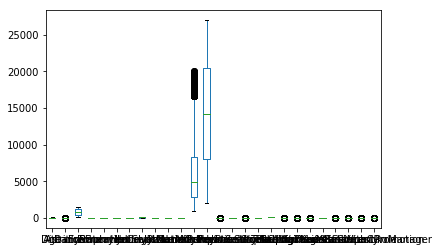

In [10]:
hr_df.plot(kind = 'box')

In [11]:
hr_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

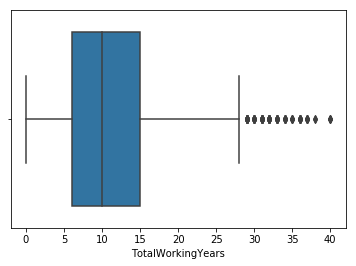

In [25]:
sns.boxplot(hr_df['TotalWorkingYears'])

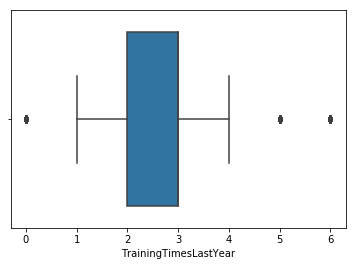

In [26]:
sns.boxplot(hr_df['TrainingTimesLastYear'])

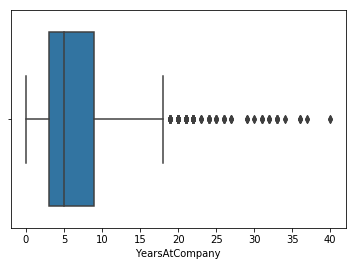

In [28]:
sns.boxplot(hr_df['YearsAtCompany'])

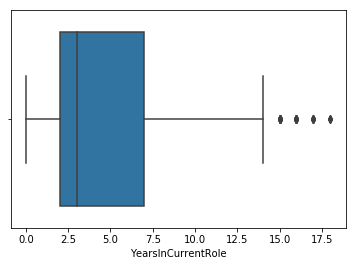

In [29]:
sns.boxplot(hr_df['YearsInCurrentRole'])

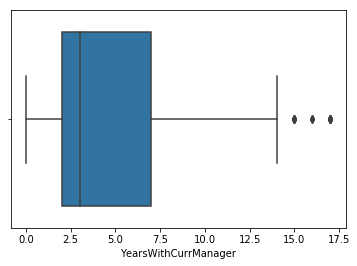

In [32]:
sns.boxplot(hr_df['YearsWithCurrManager'])

NOTE: Above Varaiables are the one with outliers but as Domain Knowledge is preffered, infomation provided is legitimate.
Thus, we keep outliers as it is and move forward towards the model building

##### Density Plots: Monthly Income

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


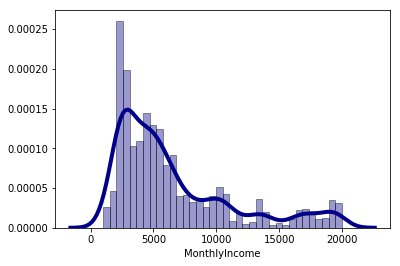

In [21]:
# Density Plot and Histogram of Monthly Income
sns.distplot(hr_df['MonthlyIncome'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

###### Density Plots: DailyRate

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


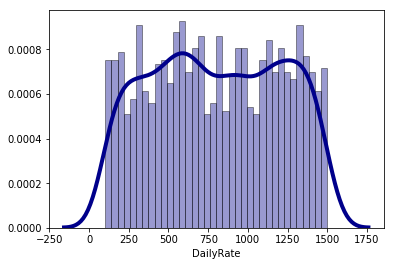

In [22]:
# Density Plot and Histogram of Daily Rate 
sns.distplot(hr_df['DailyRate'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

###### Density Plots: MonthlyRate

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


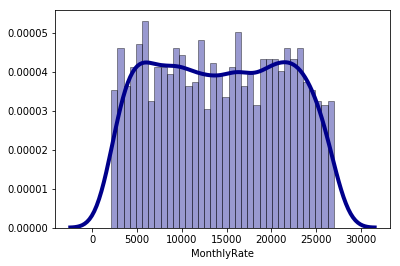

In [23]:
# Density Plot and Histogram of Monthly Rate
sns.distplot(hr_df['MonthlyRate'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

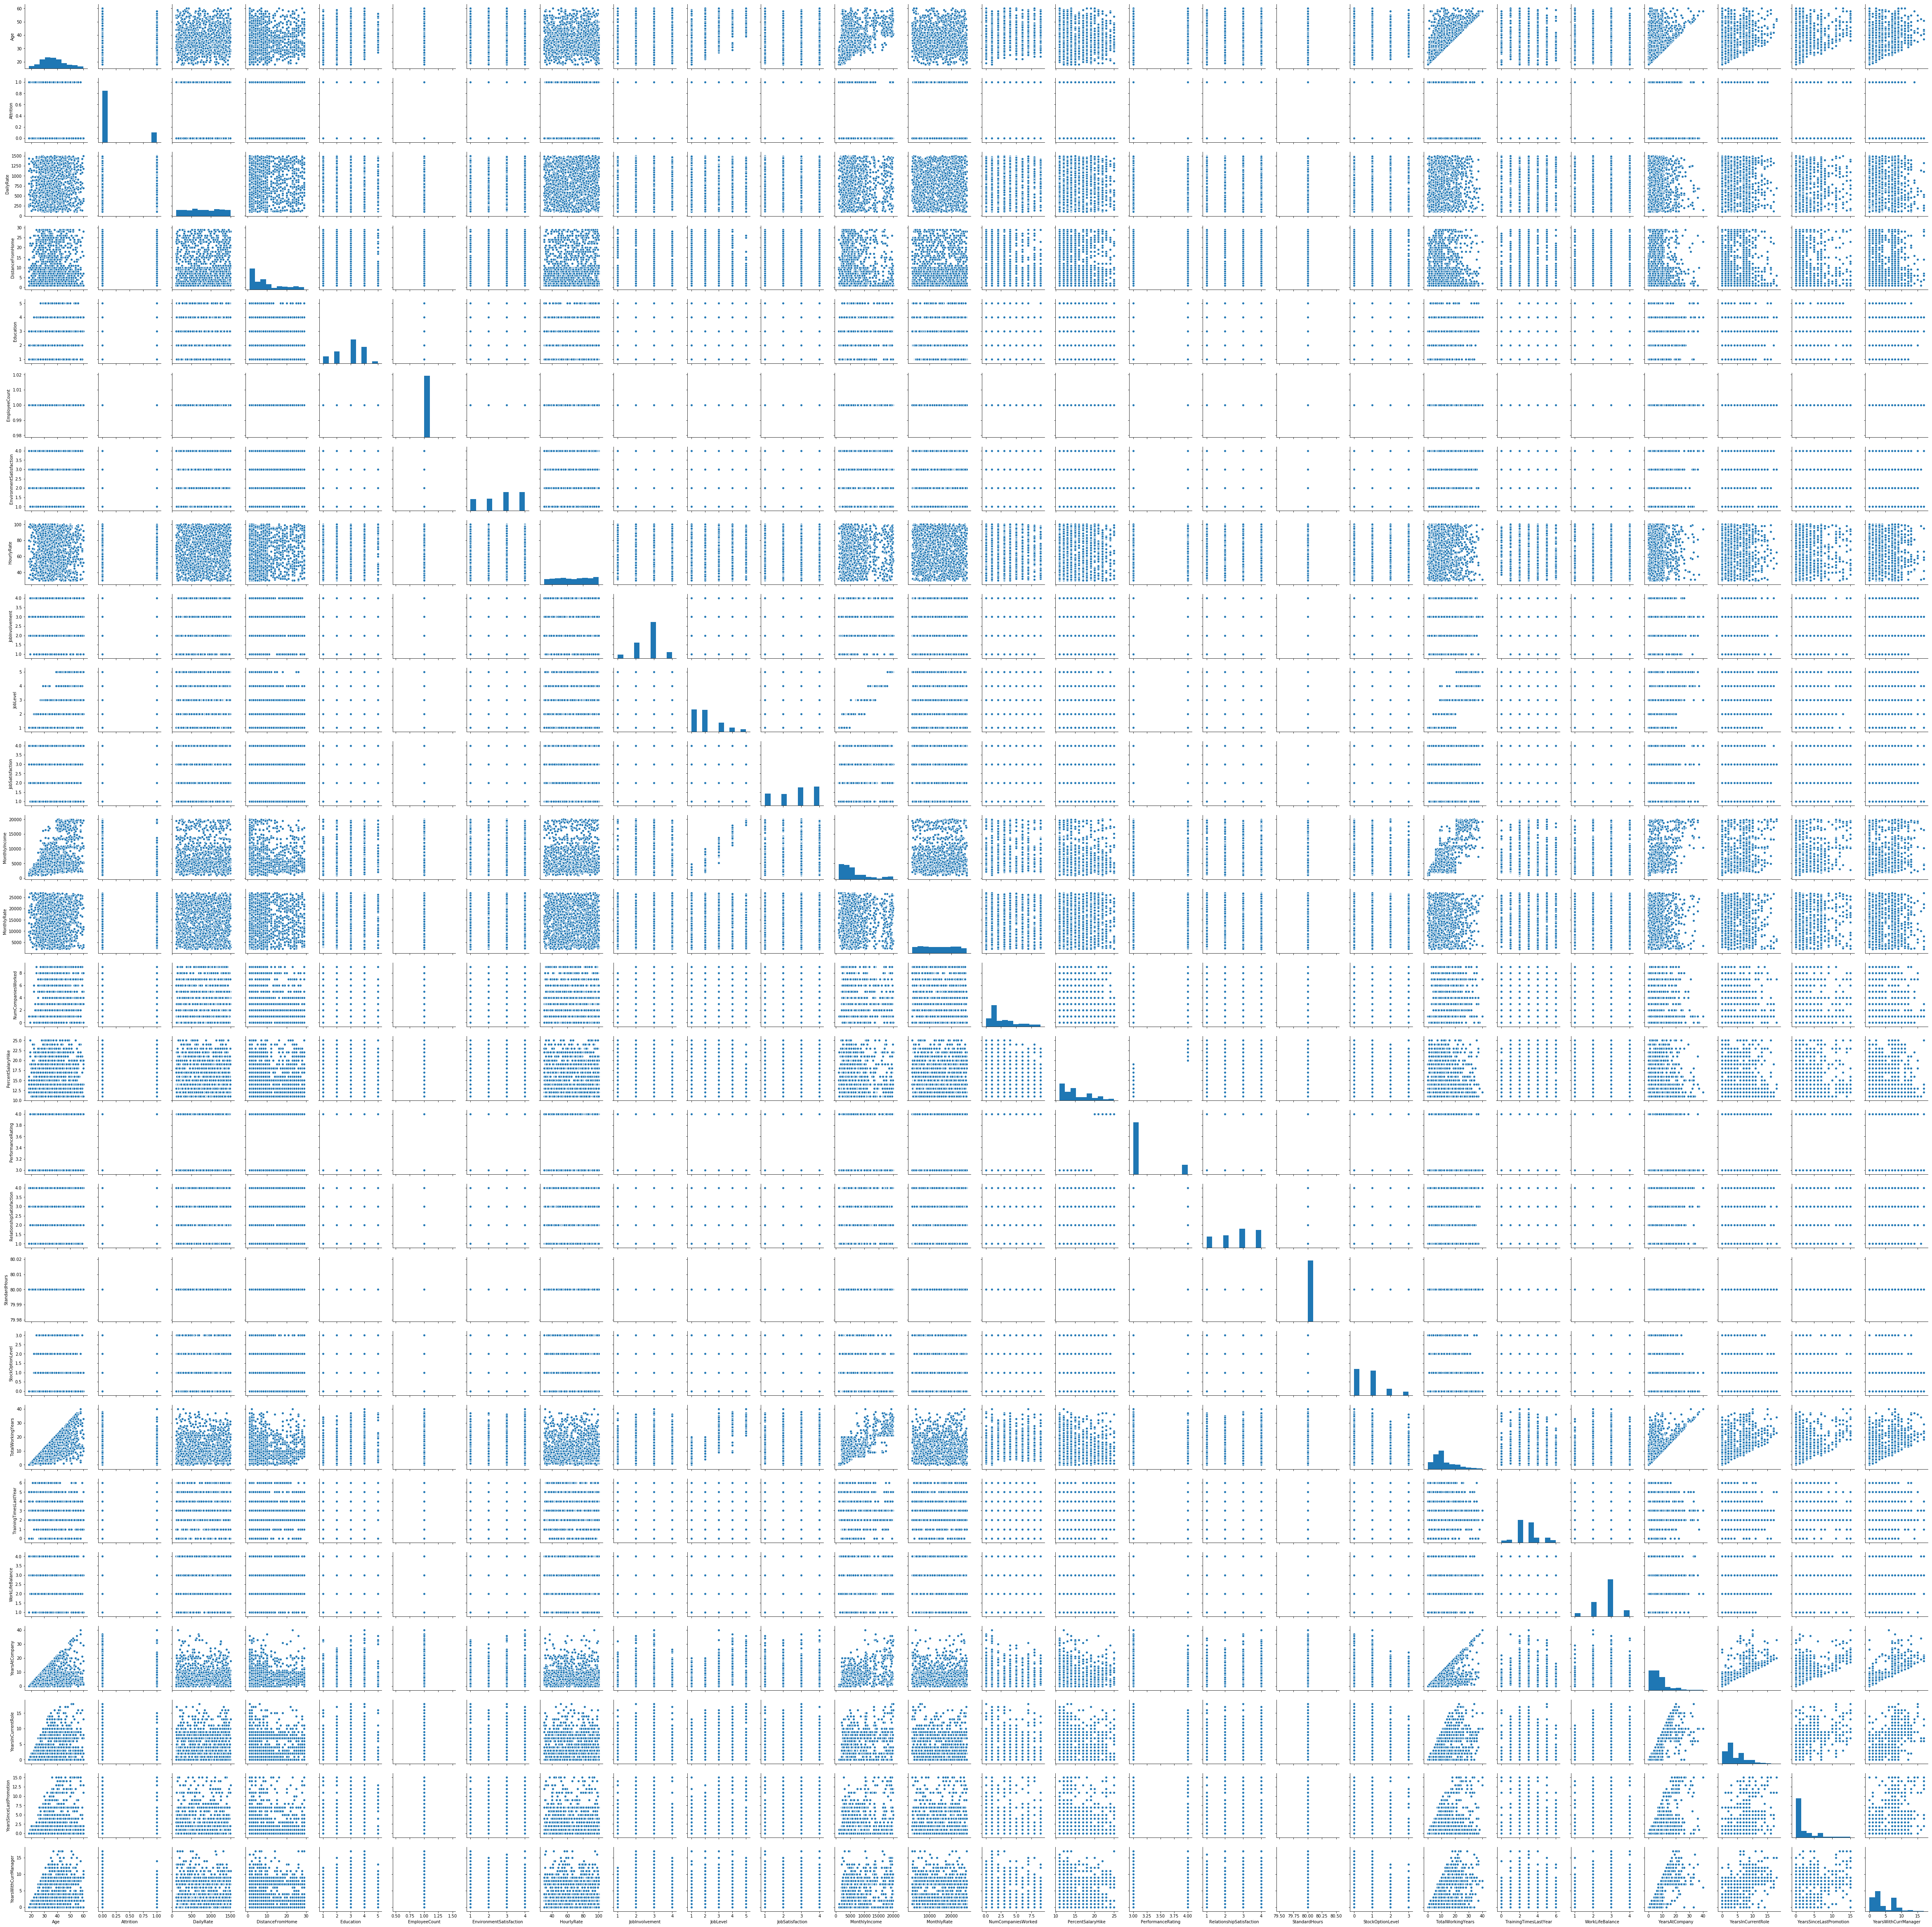

In [9]:
sns.pairplot(hr_df)

In [26]:
#well this is useless

In [10]:
numerical_feats = hr_df.dtypes[hr_df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = hr_df.dtypes[hr_df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  26
Number of Categorical features:  8


In [12]:
print(hr_df[numerical_feats].columns)
print("*"*100)
print(hr_df[categorical_feats].columns)

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
****************************************************************************************************
Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [59]:
hr_df[numerical_feats] = hr_df[numerical_feats].astype('float64')

In [61]:
hr_df[categorical_feats]= hr_df[categorical_feats].astype('float64')

In [24]:
def correlation_heat_map(dff):
    corrs = dff.corr()

    # Set the figure size
    fig, ax = plt.subplots(figsize=(20,18))

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap
    ax = sns.heatmap(corrs, mask=mask, annot=True)

    # Resize the labels
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)
    plt.show()

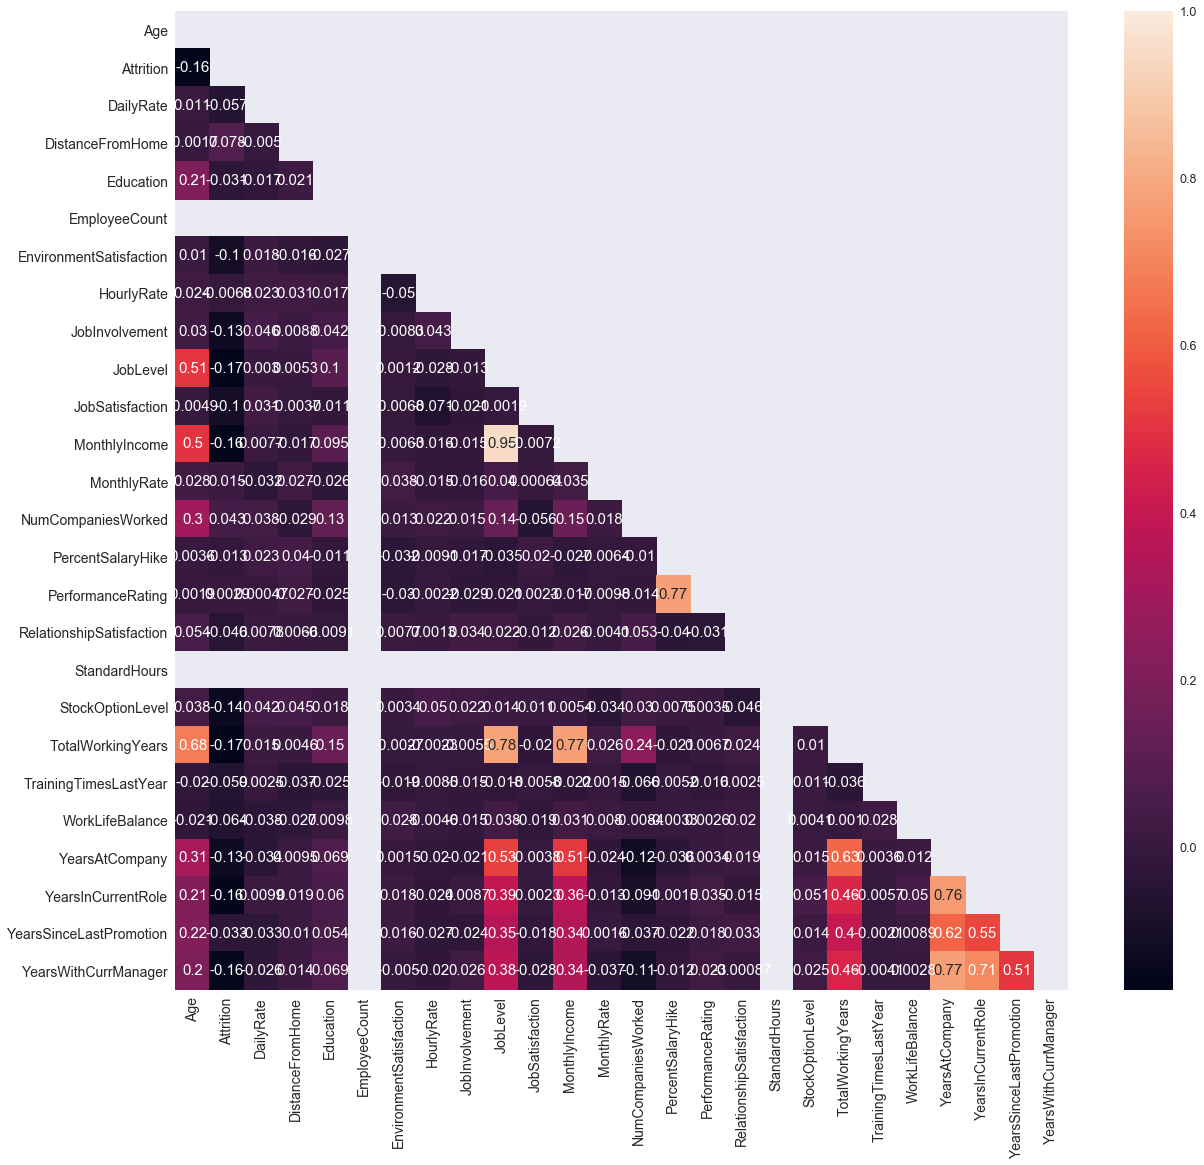

In [25]:
correlation_heat_map(hr_df)

Conclusion: As above Correlation Heat Map, Highest Correlation is between
 * Years at Company and Years with Current Manager & Years at Current Role =  [0.77 and 0.76] Correlation
 * Years at Current Role with Year with Current Manager = 0.71 Correlation
 * Total Working Years with Age, Job Level and Monthly Income = [0.68, 0.78, 0.77] Correlation (Obvious)
 * Percent Salary Hike with Performance Rating = 0.77 Correlation
 * Highest for Monthly Income with Job Level = 0.95 Correlation (Obvious)

###### Encoding Ordinal Data

In [28]:
hr_df['BusinessTravel'].value_counts()

Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64

In [30]:
hr_df['Department'].value_counts()

Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64

In [31]:
hr_df['EducationField'].value_counts()

Life Sciences       1212
Medical              928
Marketing            318
Technical Degree     264
Other                164
Human Resources       54
Name: EducationField, dtype: int64

In [32]:
hr_df['JobRole'].value_counts()

Sales Executive              652
Research Scientist           584
Laboratory Technician        518
Manufacturing Director       290
Healthcare Representative    262
Manager                      204
Sales Representative         166
Research Director            160
Human Resources              104
Name: JobRole, dtype: int64

In [33]:
hr_df['MaritalStatus'].value_counts()

Married     1346
Single       940
Divorced     654
Name: MaritalStatus, dtype: int64

In [34]:
hr_df['Over18'].value_counts()

Y    2940
Name: Over18, dtype: int64

In [35]:
hr_df['OverTime'].value_counts()

No     2108
Yes     832
Name: OverTime, dtype: int64

In [116]:
coded_hr = hr_df

In [117]:
# Encode ordinal data
coded_hr['BusinessTravel'] = hr_df['BusinessTravel'].map({'Non-Travel':0,'Travel_Rarely':1,'Travel_Frequently':2})
coded_hr['Department'] = hr_df['Department'].map({'Research & Development':0,'Sales':1,'Bnk':2,'Human Resources':3})
coded_hr['EducationField'] = hr_df['EducationField'].map({'Life Sciences':0,'Medical':1,'Marketing':2,'Technical Degree':3,'Other':4,'Human Resources':5})
coded_hr['JobRole'] = hr_df['JobRole'].map({'Sales Executive':0,'Research Scientist':1,'Laboratory Technician':2,'Manufacturing Director':3,'Healthcare Representative':4,'Manager':5,'Sales Representative':6,'Research Director':7,'Human Resources':8})
coded_hr['MaritalStatus'] = hr_df['MaritalStatus'].map({'Divorced':0,'Single':1,'Married':2})
coded_hr['Over18'] = hr_df['Over18'].map({'N':0,'Y':1})
coded_hr['OverTime'] = hr_df['OverTime'].map({'No':0,'Yes':1})

In [118]:
coded_hr.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               1       1102           1                 1   
1   49          0               2        279           0                 8   
2   37          1               1       1373           0                 2   
3   33          0               2       1392           0                 3   
4   27          0               1        591           0                 2   

   Education  EducationField  EmployeeCount  EnvironmentSatisfaction  \
0          2               0              1                        2   
1          1               0              1                        3   
2          2               4              1                        4   
3          4               0              1                        4   
4          1               1              1                        1   

           ...          RelationshipSatisfaction  StandardHours  \
0          ...                                 1             80   
1          ...                                 4             80   
2          ...                                 2             80   
3          ...                                 3             80   
4          ...                                 4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2  

[5 rows x 34 columns]

In [119]:
coded_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 34 columns):
Age                         2940 non-null int64
Attrition                   2940 non-null int64
BusinessTravel              2940 non-null int64
DailyRate                   2940 non-null int64
Department                  2940 non-null int64
DistanceFromHome            2940 non-null int64
Education                   2940 non-null int64
EducationField              2940 non-null int64
EmployeeCount               2940 non-null int64
EnvironmentSatisfaction     2940 non-null int64
Gender                      2940 non-null object
HourlyRate                  2940 non-null int64
JobInvolvement              2940 non-null int64
JobLevel                    2940 non-null int64
JobRole                     2940 non-null int64
JobSatisfaction             2940 non-null int64
MaritalStatus               2940 non-null int64
MonthlyIncome               2940 non-null int64
MonthlyRate                 

In [120]:
coded_hr['Gender'] = coded_hr['Gender'].replace(['Female','Male'],[0,1])

In [121]:
coded_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 34 columns):
Age                         2940 non-null int64
Attrition                   2940 non-null int64
BusinessTravel              2940 non-null int64
DailyRate                   2940 non-null int64
Department                  2940 non-null int64
DistanceFromHome            2940 non-null int64
Education                   2940 non-null int64
EducationField              2940 non-null int64
EmployeeCount               2940 non-null int64
EnvironmentSatisfaction     2940 non-null int64
Gender                      2940 non-null int64
HourlyRate                  2940 non-null int64
JobInvolvement              2940 non-null int64
JobLevel                    2940 non-null int64
JobRole                     2940 non-null int64
JobSatisfaction             2940 non-null int64
MaritalStatus               2940 non-null int64
MonthlyIncome               2940 non-null int64
MonthlyRate                 2

### 3.	Split file in 70 : 30

In [176]:
X= coded_hr.drop('Attrition',axis =1)
y = coded_hr['Attrition']

In [180]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

#X_std = StandardScaler().fit_transform(X)
#Using Scalor instead of zscore or Logit
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=1)

In [124]:
X.head().shape

(5, 33)

In [125]:
y.shape

(2940,)

### 4.	Build AdaBoosting Model

In [140]:
from sklearn.ensemble import AdaBoostClassifier
abcl_norm = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50)
abcl_norm = abcl_norm.fit(train_set, train_labels)

abcl = AdaBoostClassifier( n_estimators= 200) # based Estimator default then
abcl = abcl.fit(train_set, train_labels)

In [149]:
pred_abcl = abcl_norm.predict(test_set)
print("Accuracy Score using AdaBoostClassifier:",abcl_norm.score(test_set , test_labels))

pred_abcl_norm = abcl.predict(test_set)
print("Accuracy Score using Default AdaBoostClassifier:",abcl.score(test_set , test_labels))

Accuracy Score using AdaBoostClassifier: 0.927437641723356
Accuracy Score using Default AdaBoostClassifier: 0.8956916099773242


In [156]:
#Let's see how our model performed
print("Default AdaBoost Model Result \n\n",classification_report(test_labels, pred_abcl_norm))
print("\n Descision Tree Classifier as Base Estimator Result\n\n",classification_report(test_labels, pred_abcl))

Default AdaBoost Model Result 

              precision    recall  f1-score   support

          0       0.91      0.97      0.94       729
          1       0.78      0.56      0.65       153

avg / total       0.89      0.90      0.89       882


 Descision Tree Classifier as Base Estimator Result

              precision    recall  f1-score   support

          0       0.95      0.96      0.96       729
          1       0.80      0.78      0.79       153

avg / total       0.93      0.93      0.93       882



###### Receiver Operating Characterisitcs: Default AdaBoost CLassifier

In [203]:
from sklearn.metrics import roc_curve, auc

Area Under the Curve 0.7613168724279836


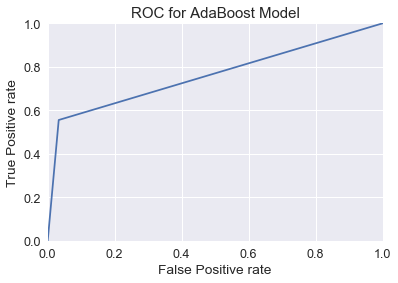

In [204]:
fpr,tpr, _ = roc_curve(test_labels, pred_abcl_norm)
roc_auc = auc(fpr,tpr)

print("Area Under the Curve", roc_auc)
plt.figure()
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title("ROC for AdaBoost Model")
plt.show()

###### Receiver Operating Characterisitcs: AdaBoost CLassifier (Descision Tree Classifier as Base Estimator Result)

Area Under the Curve 0.868312757201646


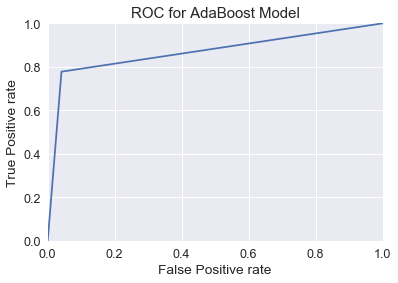

In [205]:
fpr,tpr, _ = roc_curve(test_labels, pred_abcl)
roc_auc = auc(fpr,tpr)

print("Area Under the Curve", roc_auc)
plt.figure()
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title("ROC for AdaBoost Model")
plt.show()

### 5.	Build Random Forest Model

In [143]:
from sklearn.ensemble import RandomForest

In [191]:
rfc = RandomForestClassifier(n_estimators=200)
rfc = rfc.fit(train_set, train_labels)

In [192]:
pred_rfc= rfc.predict(test_set)
print("Accuracy Score using Random Forest Classifier:",rfc.score(test_set , test_labels))

Accuracy Score using Random Forest Classifier: 0.9455782312925171


In [193]:
#Let's see how our model performed
print("Random Forest Classifier Result\n\n",classification_report(test_labels, pred_rfc))

Random Forest Classifier Result

              precision    recall  f1-score   support

          0       0.95      0.99      0.97       729
          1       0.95      0.73      0.82       153

avg / total       0.95      0.95      0.94       882



###### Receiver Operating Characterisitcs: Random Forest Classifier

Area Under the Curve 0.8586298717017672


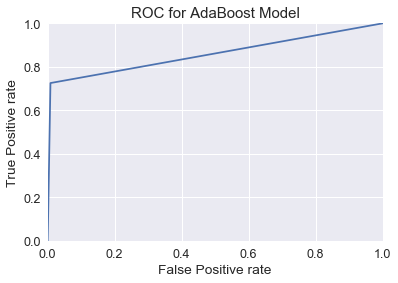

In [206]:
fpr,tpr, _ = roc_curve(test_labels, pred_rfc)
roc_auc = auc(fpr,tpr)

print("Area Under the Curve", roc_auc)
plt.figure()
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title("ROC for AdaBoost Model")
plt.show()

### 6.	Find Important Variables|

###### Pareto Approach

In [166]:
# Select top 20% of features

# Feature Selector
# Import
from sklearn.feature_selection import SelectPercentile, f_regression

# Instantiate object
selector_f = SelectPercentile(f_regression, percentile=20)

# Fit and transform
x_best = selector_f.fit_transform(X, y)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:303: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence f

In [167]:
support = np.asarray(selector_f.get_support())

# Enable scientific notation
pd.set_option('display.float_format', '{:.2e}'.format)

# Column names of top 20%
features = np.asarray(X.columns.values)
features_with_support = features[support]
# print('Top 20% of the best, associated features to SalePrice\n',columns_with_support)
# print('Number of Features:', len(columns_with_support))

#f-scores of top 20%
fscores = np.asarray(selector_f.scores_)
fscores_with_support = fscores[support]

# p-values of top 20%
pvalues = np.asarray(selector_f.pvalues_)
pvalues_with_support = pvalues[support]

# Dataframe of top 20%
top20 = pd.DataFrame({'F-score':fscores_with_support,
                      'p-value':pvalues_with_support},
                     index = features_with_support)
# top20.index.name = 'Feature'
print('Top 20% best associated features to SalePrice\nNumber of features:',len(features_with_support))
print(top20.sort_values(by = 'p-value', ascending = 'True'))

Top 20% best associated features to SalePrice
Number of features: 7
                      F-score  p-value
OverTime             1.89e+02 8.12e-42
TotalWorkingYears    8.86e+01 9.60e-21
JobLevel             8.65e+01 2.66e-20
YearsInCurrentRole   7.77e+01 1.98e-18
MonthlyIncome        7.70e+01 2.80e-18
Age                  7.64e+01 3.82e-18
YearsWithCurrManager 7.35e+01 1.62e-17


C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Note:The top 20% of features are all statistically significant as their p-values are far under .05. This further confirms that these features will be good to use in predicting SalePrice

In [172]:
best_feat = coded_hr[features_with_support]

In [173]:
best_feat.head()

Age  JobLevel  MonthlyIncome  OverTime  TotalWorkingYears  \
0   41         2           5993         1                  8   
1   49         2           5130         0                 10   
2   37         1           2090         1                  7   
3   33         1           2909         1                  8   
4   27         1           3468         0                  6   

   YearsInCurrentRole  YearsWithCurrManager  
0                   4                     5  
1                   7                     7  
2                   0                     0  
3                   7                     0  
4                   2                     2

In [174]:
best_feat.columns

Index(['Age', 'JobLevel', 'MonthlyIncome', 'OverTime', 'TotalWorkingYears',
       'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')

##### Conclusion: Above are the Best and Most Important Variables

### 7.	Compare the various Performance Measures

###### Building Different Models

In [181]:
LR_df = LogisticRegression()
NB_df = GaussianNB()
KNN_df = KNeighborsClassifier()

In [182]:
LR_df.fit(train_set, train_labels)
NB_df.fit(train_set, train_labels)
KNN_df.fit(train_set, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [183]:
print("LR Score is",LR_df.score(test_set , test_labels))
print("NB Score is",NB_df.score(test_set , test_labels))
print("KNN Score is",KNN_df.score(test_set , test_labels))

LR Score is 0.873015873015873
NB Score is 0.7573696145124716
KNN Score is 0.8208616780045351


In [184]:
pred_val_LR = LR_df.predict(test_set)
pred_val_NB= NB_df.predict(test_set)
pred_val_KNN = KNN_df.predict(test_set)

In [187]:
#Let's see how our model performed
print("Logistic Regression Result \n\n",classification_report(test_labels, pred_val_LR))
print("\n Naive Bayes Result \n\n",classification_report(test_labels, pred_val_NB))
print("\n K-Nearest Neighbors Result \n\n",classification_report(test_labels, pred_val_KNN))

Logistic Regression Result 

              precision    recall  f1-score   support

          0       0.87      0.99      0.93       729
          1       0.85      0.33      0.47       153

avg / total       0.87      0.87      0.85       882


 Naive Bayes Result 

              precision    recall  f1-score   support

          0       0.90      0.79      0.84       729
          1       0.38      0.60      0.46       153

avg / total       0.81      0.76      0.78       882


 K-Nearest Neighbors Result 

              precision    recall  f1-score   support

          0       0.85      0.94      0.90       729
          1       0.47      0.24      0.31       153

avg / total       0.79      0.82      0.80       882



###### Receiver Operating Characterisitcs: Logistic Regression

Area Under the Curve 0.6572258533042846


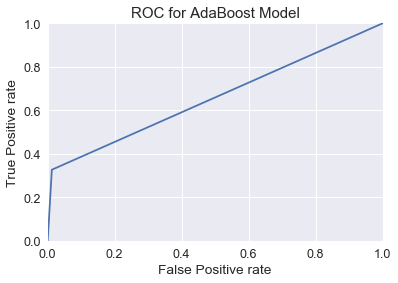

In [207]:
fpr,tpr, _ = roc_curve(test_labels, pred_val_LR)
roc_auc = auc(fpr,tpr)

print("Area Under the Curve", roc_auc)
plt.figure()
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title("ROC for AdaBoost Model")
plt.show()

##### Receiver Operating Characterisitcs: Naive Bayes

Area Under the Curve 0.6957153231663036


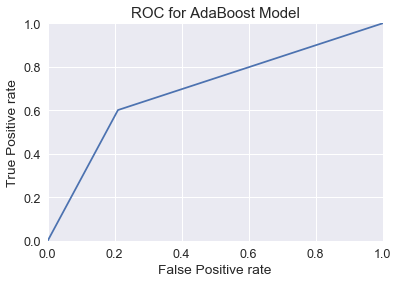

In [208]:
fpr,tpr, _ = roc_curve(test_labels, pred_val_NB)
roc_auc = auc(fpr,tpr)

print("Area Under the Curve", roc_auc)
plt.figure()
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title("ROC for AdaBoost Model")
plt.show()

##### Receiver Operating Characterisitcs: K-Nearest Neighbors

Area Under the Curve 0.589526345517631


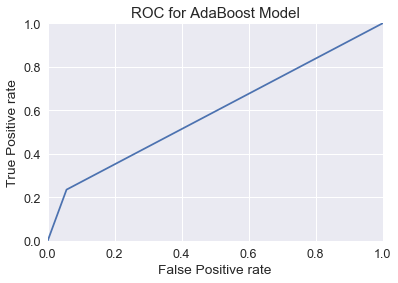

In [209]:
fpr,tpr, _ = roc_curve(test_labels, pred_val_KNN)
roc_auc = auc(fpr,tpr)

print("Area Under the Curve", roc_auc)
plt.figure()
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title("ROC for AdaBoost Model")
plt.show()

In [195]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True, oob_score=True)
bgcl = bgcl.fit(train_set, train_labels)
bgcl.oob_score_     ### testing the ensemble against OOB

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


0.9081632653061225

In [196]:
test_pred_bag = bgcl.predict(test_set)
bgcl.score(test_set , test_labels)

0.909297052154195

In [197]:
from sklearn import metrics
cr = metrics.classification_report(test_pred_bag , test_labels)
print(cr)

             precision    recall  f1-score   support

          0       0.98      0.91      0.95       785
          1       0.56      0.88      0.68        97

avg / total       0.94      0.91      0.92       882



##### Receiver Operating Characterisitcs: Bagging Ensemble Technique

Area Under the Curve 0.7695473251028806


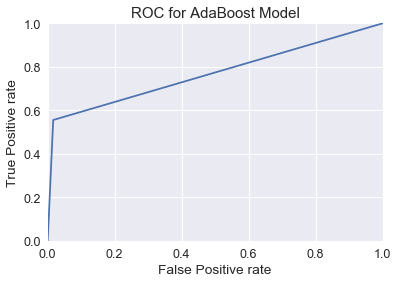

In [210]:
fpr,tpr, _ = roc_curve(test_labels, test_pred_bag)
roc_auc = auc(fpr,tpr)

print("Area Under the Curve", roc_auc)
plt.figure()
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title("ROC for AdaBoost Model")
plt.show()

### Comparision

Logistic Regression: 0.878231 (0.021393)
AdaBoost: 0.910884 (0.012432)
Naive Bayes: 0.806122 (0.028620)
K-Nearest Neighbors: 0.865306 (0.023427)


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means to

Bagging: 0.957483 (0.012658)


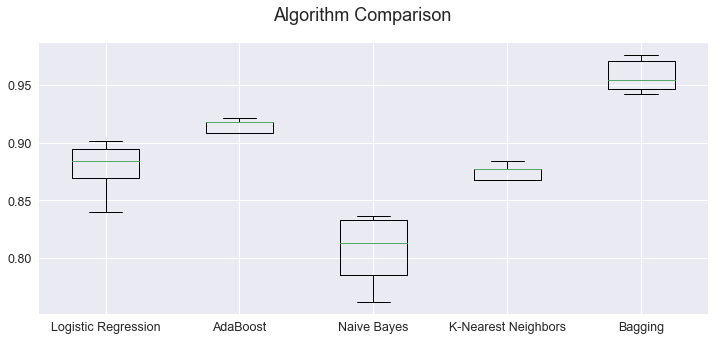

In [212]:
import matplotlib.pyplot as plt
from sklearn import model_selection
models = []
models.append(('Logistic Regression', LR_df))  # Model Name assigned.
models.append(('AdaBoost', abcl))
models.append(('Naive Bayes', NB_df))
models.append(('K-Nearest Neighbors', KNN_df))
models.append(('Bagging', bgcl))

# evaluate each model in turn
#Svm is like linear and non-linear regression which have its own kernel.
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring) # X_std for standard Scalor
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure(figsize=(12,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#Here the median is definitely more important in the boxplot so, model should be decided by its median value.
# Here , there will be slight variance because the model itself has internal change.

In this case: Bagging Algorithm gives the highest Accuracy with lowest Standard Deviation.

### 8.	Give inferences based on your model output. Suggest Model Implementation Strategy.

# Conclusion: Based on the deducted data
* Bagging Optimization technique is definetely better for this dataset.
* As shown in above comparision Bagging using Default model i.e. Decision Trees performs within realively strict range and is better.
* Adaboost Classifer have a little bit of more standard deviation but the accuracy is more as compared to the other lower accuracy models.
* So, as best choice of Algorithm here will be Decision Trees with Bagging as Ensemble Technique (Preffered) going for Production System.